In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [116]:
from google.colab import files
import io
data = files.upload()

Saving Type1Diabetes.csv to Type1Diabetes (1).csv


1.Import & Check The Data

In [117]:
df = pd.read_csv('Type1Diabetes.csv')
df.head()

,Age,BloodPressure(120/80),BMI,Blood Glucose Level(BGL),Heart Rate,Genetics (Y/N),Meal Carbohydrates
0,21,66,28.1,70,96,1,9
1,21,50,23.0,77,95,1,10
2,21,0,0.0,71,96,1,16
3,21,55,19.1,82,91,0,20
4,21,82,24.7,74,100,1,30


In [118]:
df.tail()

,Age,BloodPressure(120/80),BMI,Blood Glucose Level(BGL),Heart Rate,Genetics (Y/N),Meal Carbohydrates
705,69,80,26.8,72,97,1,21
706,69,82,0.0,60,117,0,54
707,70,82,32.5,60,119,0,10
708,72,0,19.6,51,102,0,10
709,81,74,25.9,51,101,0,11


In [119]:
df.shape

(710, 7)

In [120]:
df.describe()

,Age,BloodPressure(120/80),BMI,Blood Glucose Level(BGL),Heart Rate,Genetics (Y/N),Meal Carbohydrates
count,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,33.140845,68.735211,31.879296,66.387324,99.454930,0.246479,16.771831
std,11.770964,19.790305,8.002313,16.159487,13.273198,0.431264,13.484831
min,21.000000,0.000000,0.000000,50.000000,78.000000,0.000000,2.000000
25%,24.000000,62.500000,27.100000,51.000000,89.000000,0.000000,7.250000
50%,29.000000,72.000000,32.000000,60.000000,98.000000,0.000000,12.000000
75%,40.000000,80.000000,36.500000,78.000000,108.000000,0.000000,21.000000
max,81.000000,122.000000,67.100000,100.000000,130.000000,1.000000,74.000000


In [121]:
df = df.dropna()
# Assuming 'Age' is the target variable
X = df.drop(columns=['Age'])
y = df['Age']

2.After Cleaning The Data. It Show relation between columns

<ipython-input-122-90dd43345b98>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


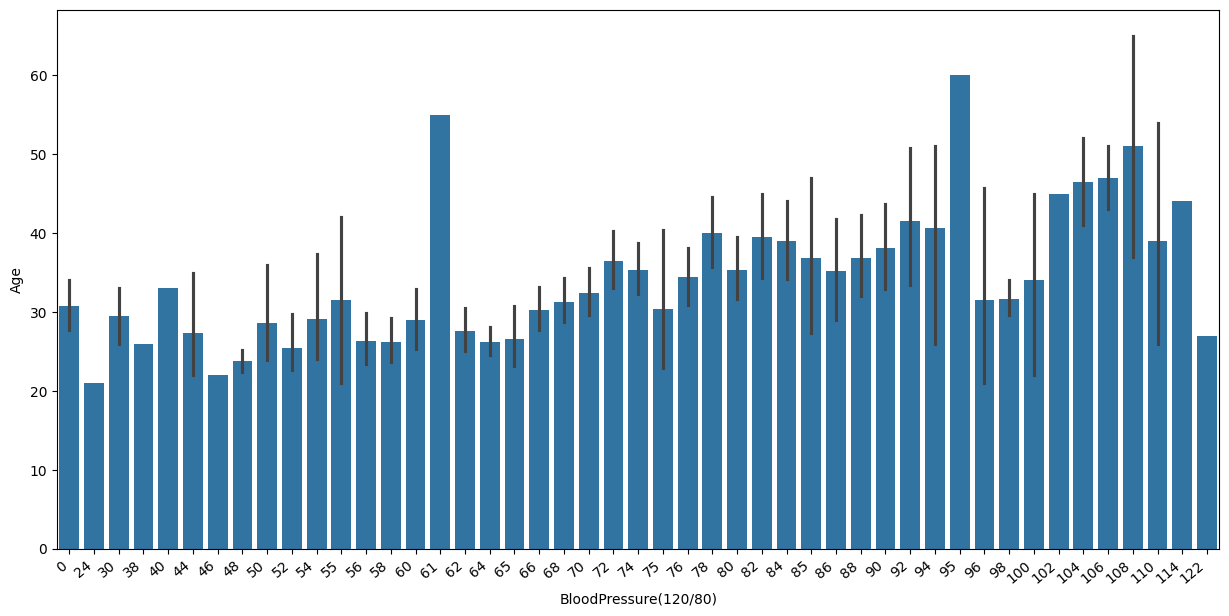

In [122]:
#Check Relation Between Person Age & Blood Pressure
import seaborn as sns
plt.subplots(figsize=(15, 7))
ax = sns.barplot(x='BloodPressure(120/80)', y='Age', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

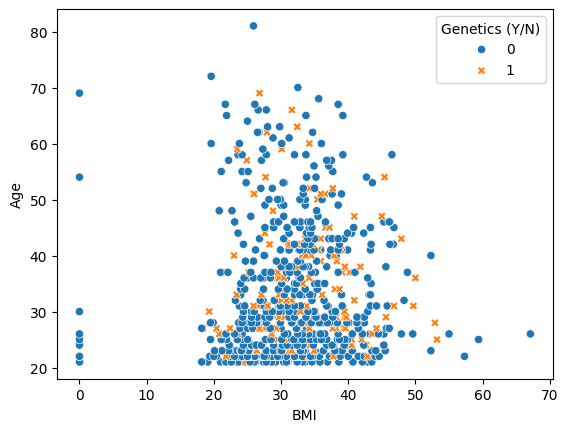

In [123]:
#Check Relation Between Person Age, Body Mass Index & Genetics
sns.scatterplot(x="BMI", y="Age", hue="Genetics (Y/N)", style="Genetics (Y/N)", data=df)
plt.show()

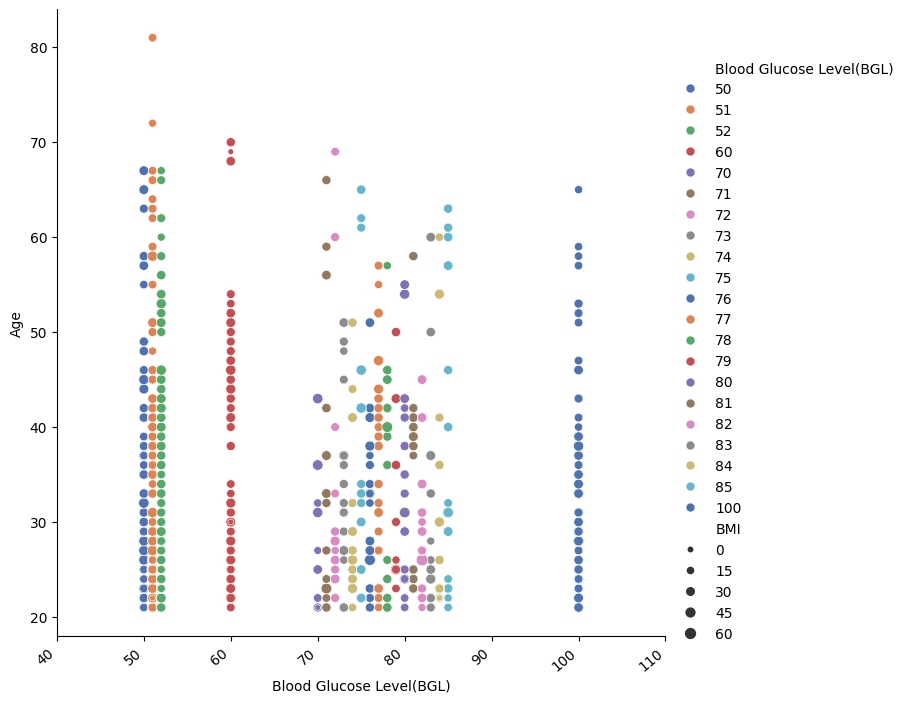

In [124]:
#Check Relation Between Blood Glucose Level(BGL) , BMI & Age
ax = sns.relplot(x='Blood Glucose Level(BGL)', y='Age', data=df, hue='Blood Glucose Level(BGL)', size='BMI', height=7, aspect=1, palette="deep")
ax.set_xticklabels(rotation=40, ha='right')

In [125]:
X

,BloodPressure(120/80),BMI,Blood Glucose Level(BGL),Heart Rate,Genetics (Y/N),Meal Carbohydrates
0,66,28.1,70,96,1,9
1,50,23.0,77,95,1,10
2,0,0.0,71,96,1,16
3,55,19.1,82,91,0,20
4,82,24.7,74,100,1,30
...,...,...,...,...,...,...
705,80,26.8,72,97,1,21
706,82,0.0,60,117,0,54
707,82,32.5,60,119,0,10
708,0,19.6,51,102,0,10


3.Check Correlation between table

In [126]:
df.corr()

,Age,BloodPressure(120/80),BMI,Blood Glucose Level(BGL),Heart Rate,Genetics (Y/N),Meal Carbohydrates
Age,1.000000,0.237515,0.036475,-0.002623,-0.002848,-0.012961,-0.062122
BloodPressure(120/80),0.237515,1.000000,0.279390,0.014858,-0.004491,0.059383,0.023398
BMI,0.036475,0.279390,1.000000,0.023595,0.018836,0.036996,-0.025674
Blood Glucose Level(BGL),-0.002623,0.014858,0.023595,1.000000,-0.532906,0.431128,0.000063
Heart Rate,-0.002848,-0.004491,0.018836,-0.532906,1.000000,-0.299523,-0.030845
Genetics (Y/N),-0.012961,0.059383,0.036996,0.431128,-0.299523,1.000000,-0.006808
Meal Carbohydrates,-0.062122,0.023398,-0.025674,0.000063,-0.030845,-0.006808,1.000000


<Axes: >

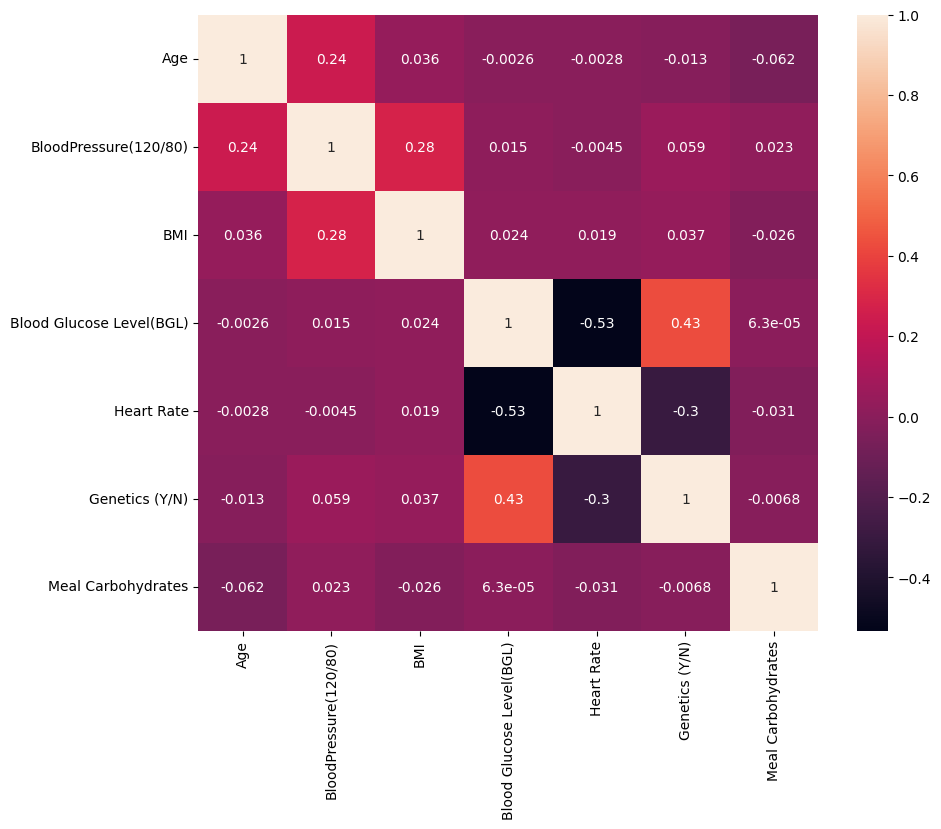

In [127]:
#Corelation using plot
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True)

4.Check Negative value in table

In [128]:
#Checking for negative value in dataset
negative_values = (df < 0).any().any()

if negative_values:
    print("Negative values exist in the dataset.")
else:
    print("No negative values in the dataset.")

No negative values in the dataset.


5.Check Skewness

In [129]:
#Check Skewness
skewness = df.skew()
print("Skewness of numeric columns:")
print(skewness)

Skewness of numeric columns:
Age                         1.165509
BloodPressure(120/80)      -1.827590
BMI                        -0.439971
Blood Glucose Level(BGL)    0.644329
Heart Rate                  0.433254
Genetics (Y/N)              1.179032
Meal Carbohydrates          1.570600
dtype: float64


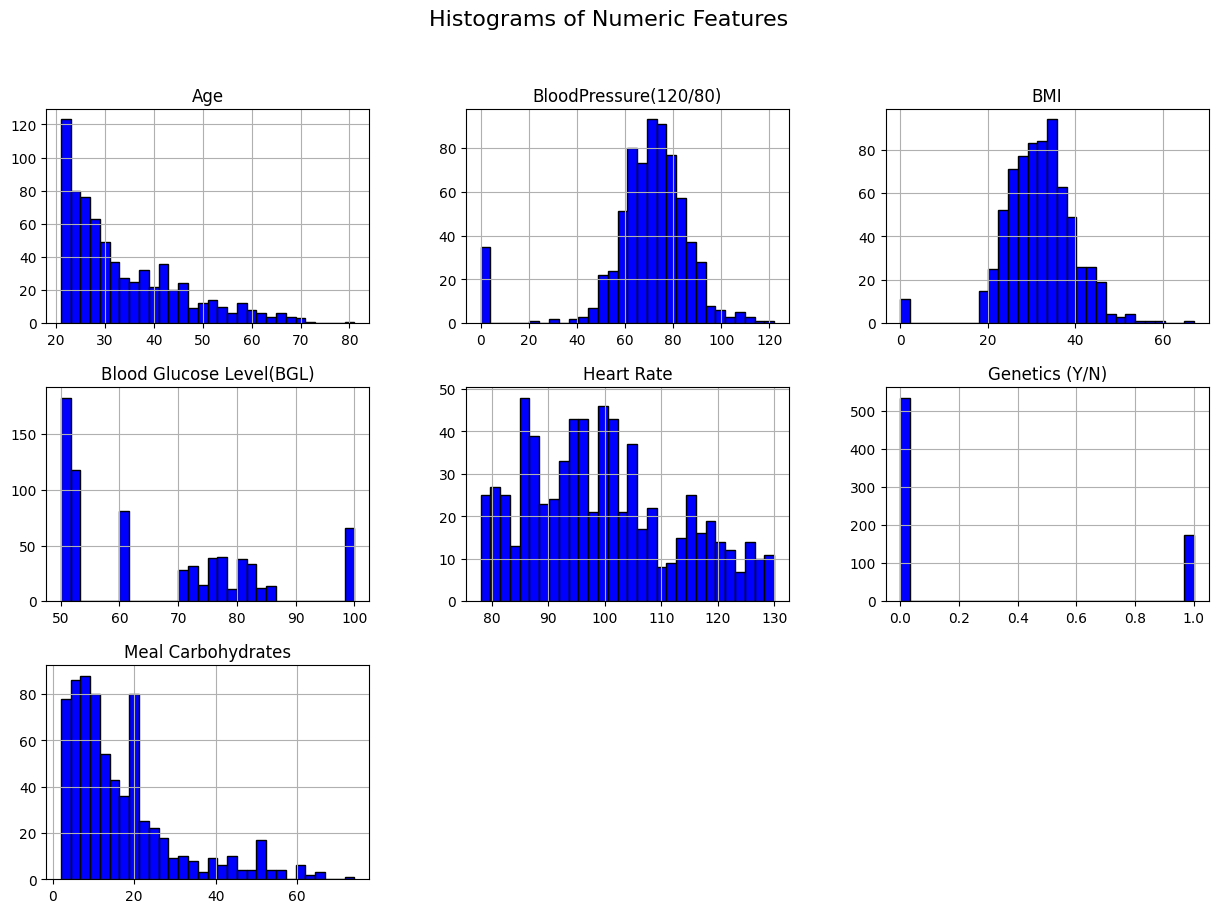

In [130]:
#Skewness Using matplotlib
import matplotlib.pyplot as plt

# Plot histograms for each numeric column
df.hist(bins=30, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

<ipython-input-131-09dff6b23855>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, label=column)


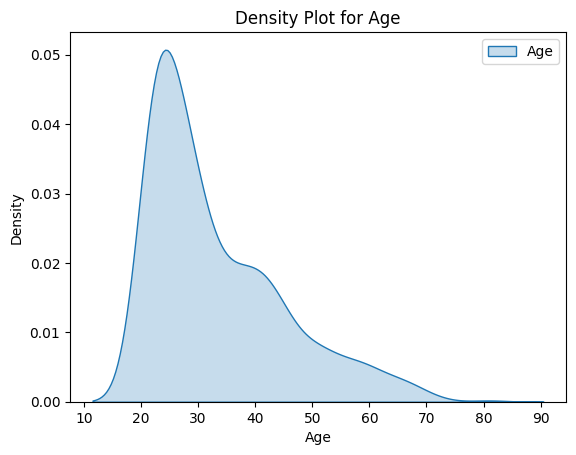

<ipython-input-131-09dff6b23855>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, label=column)


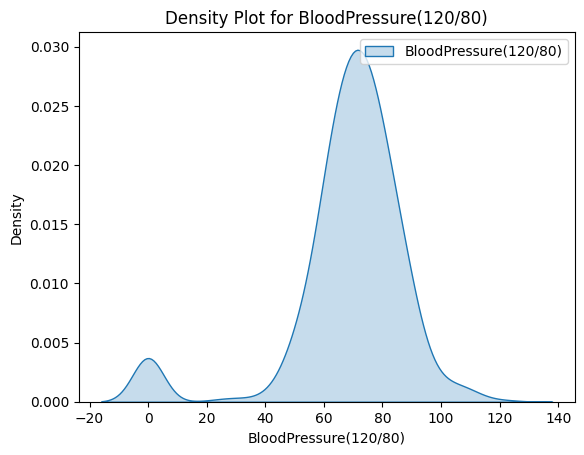

<ipython-input-131-09dff6b23855>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, label=column)


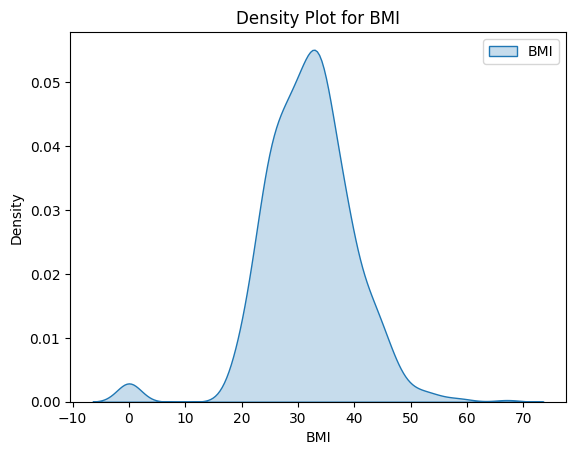

<ipython-input-131-09dff6b23855>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, label=column)


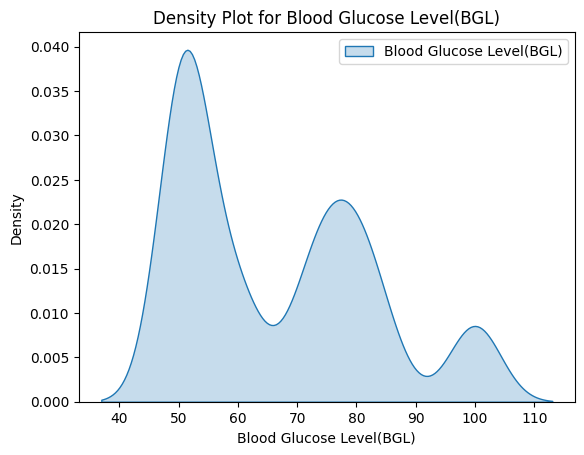

<ipython-input-131-09dff6b23855>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, label=column)


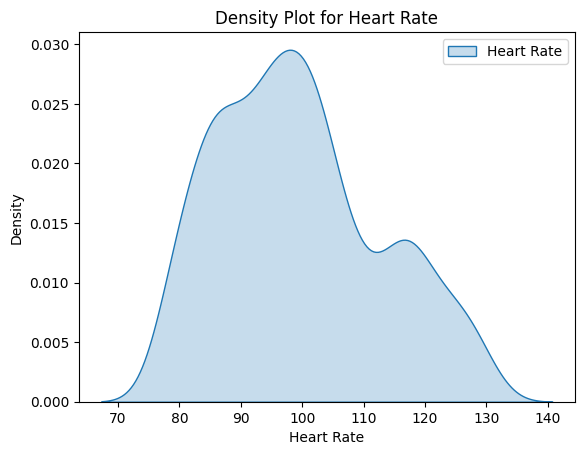

<ipython-input-131-09dff6b23855>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, label=column)


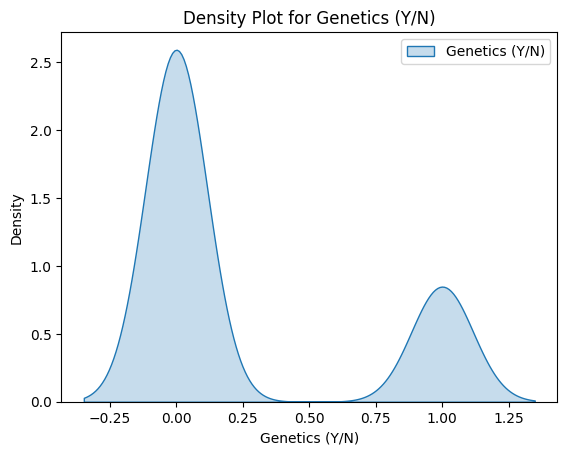

<ipython-input-131-09dff6b23855>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, label=column)


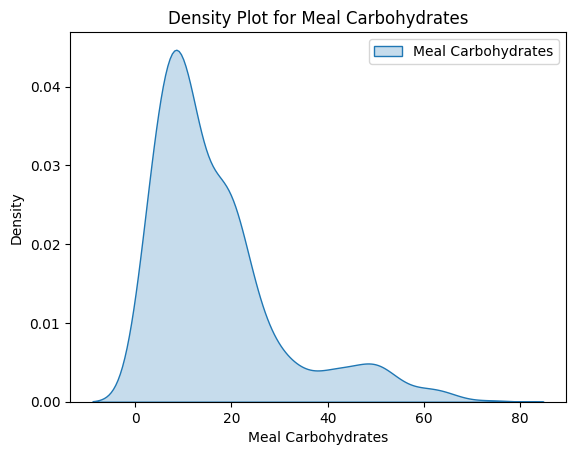

In [131]:
import seaborn as sns

# Plot density for each numeric column
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.kdeplot(df[column], shade=True, label=column)
    plt.title(f"Density Plot for {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

6.Improve Skewness

In [132]:
# Identify columns with skewness above a threshold
high_skew_columns = skewness[abs(skewness) > 1]  # Adjust threshold as needed
print("Highly skewed columns:")
print(high_skew_columns)

Highly skewed columns:
Age                      1.165509
BloodPressure(120/80)   -1.827590
Genetics (Y/N)           1.179032
Meal Carbohydrates       1.570600
dtype: float64


In [133]:
#Transform Skewed Data Log Transformation
df['Age'] = np.log1p(df['Age'])
df['BloodPressure(120/80)'] = np.log1p(df['BloodPressure(120/80)'])

In [134]:
#Square Root Transformation
df['Genetics (Y/N)  '] = np.sqrt(df['Genetics (Y/N)'])

In [135]:
#Box-Cox Transformation
from scipy.stats import boxcox
df['Meal Carbohydrates'], _ = boxcox(df['Meal Carbohydrates'] + 1)

<ipython-input-143-2b213900eb5b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, label=column)


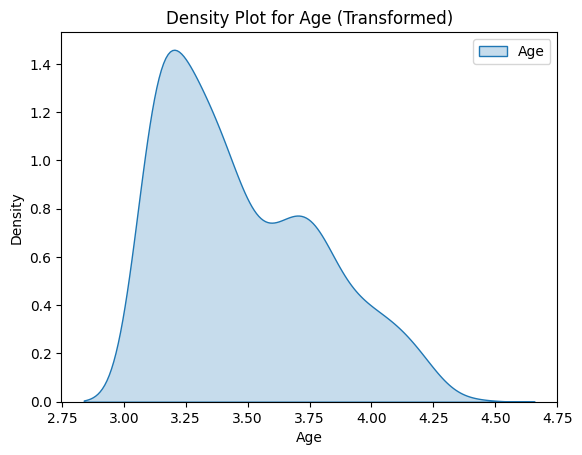

<ipython-input-143-2b213900eb5b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, label=column)


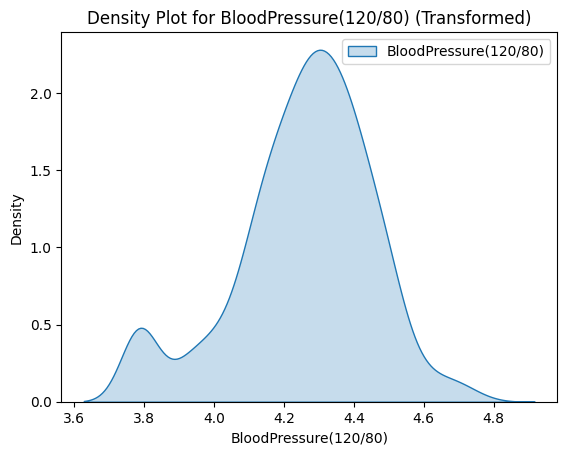

<ipython-input-143-2b213900eb5b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, label=column)
<ipython-input-143-2b213900eb5b>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[column], shade=True, label=column)


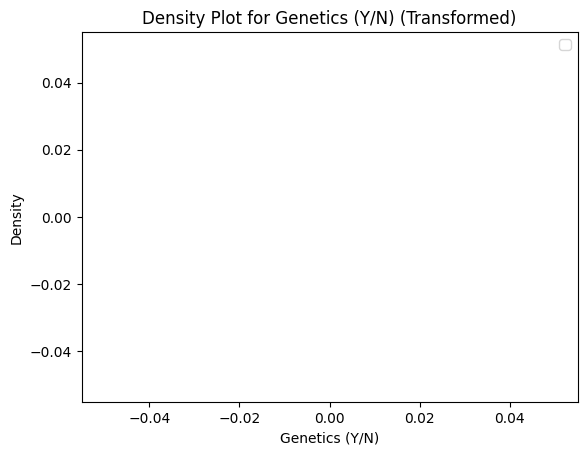

<ipython-input-143-2b213900eb5b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, label=column)


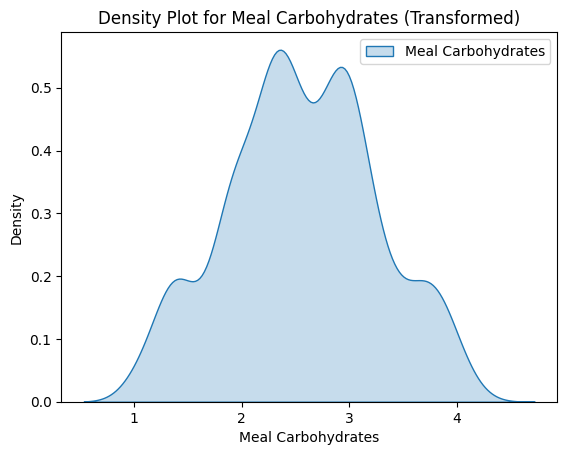

In [143]:
#Visualize Transformed Data
#Density Plot After Transformation
for column in high_skew_columns.index:  # Iterate over the index of high_skew_columns (column names)
    sns.kdeplot(df[column], shade=True, label=column)
    plt.title(f"Density Plot for {column} (Transformed)")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

7.Linear regression model

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pickle

In [145]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [146]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [147]:
# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [148]:
# Model Evaluation
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [150]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 148.39747043047785
R² Score: 0.0018684508026468594


In [151]:
# Save the trained model
pickle.dump(lr, open('linear_regression_model.pkl', 'wb'))

9.Random Forest Model

In [152]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [153]:
# Choose a model: Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

In [154]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [155]:
# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 136.7981833032082
R² Score: 0.07988605040418806


In [157]:
# Save the model
import pickle
pickle.dump(best_model, open('Type1_model.pkl', 'wb'))

In [158]:
# Load and predict with the saved model
loaded_model = pickle.load(open('Type1_model.pkl', 'rb'))
sample_input = pd.DataFrame([[82, 32.7, 74, 100, 1, 30]],
                            columns=['BloodPressure(120/80)', 'BMI', 'Blood Glucose Level(BGL)',
                                     'Heart Rate', 'Genetics (Y/N)', 'Meal Carbohydrates'])

In [159]:
scaled_sample = scaler.transform(sample_input)
prediction = loaded_model.predict(scaled_sample)
print(f"Prediction for sample input: {prediction}")

Prediction for sample input: [33.70706512]
